## Learning and Predicting Chaos Using LSTM RNNs

***
> **Malvern Madondo**, **Dr. Tom Gibbons** <br>
> Mathematics, Computer Information Systems Department <br>
> The College of St. Scholastica <br>
> Duluth, MN 55811

In [1]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM, SimpleRNN
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Generate Time Series using the Lorenz System of DE

In [4]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    # Label the axes
    ax.set_title('The Lorenz Attractor')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [5]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting at zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [6]:
sigma=10.0
beta=8.0/3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [7]:
#print (t)

In [8]:

N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[  6.67935224   1.63918745  -0.98332142]
 [ -2.41427874 -10.61619685  10.9026374 ]
 [  8.58555147  -9.04224406  -2.84732561]
 [ -0.54707696  -0.8054267   14.06097186]
 [-12.92968832  -5.40329092   1.88625791]]
Random point1 =  [0.93537418 0.15102081 0.97773922]
shape of t =  (1000,)
 lor1 =  [[  0.93537418   0.15102081   0.97773922]
 [  0.90655257   0.24983457   0.96809034]
 [  0.88267544   0.34544458   0.95886909]
 ...
 [ -9.42137766 -10.94080412  26.14368542]
 [ -9.48150042 -10.96465426  26.27833492]
 [ -9.54010459 -10.98367788  26.41495654]]
shape of lor1 =  (1000, 3)


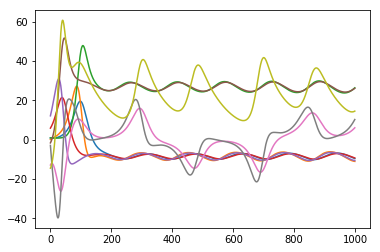

In [9]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

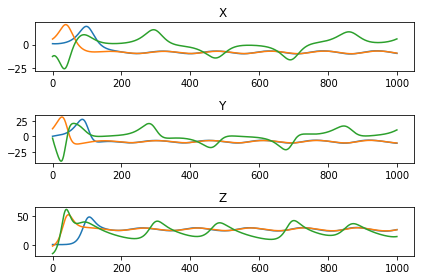

In [10]:
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.tight_layout() #add spacing between subplots
plt.show()

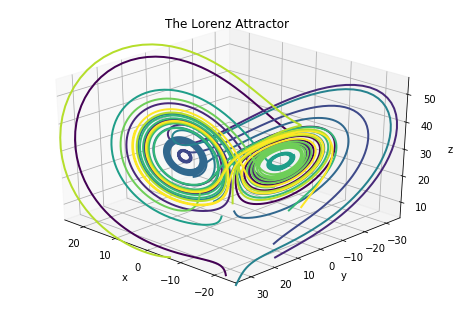

In [11]:
t, x_t = solve_lorenz_graph(angle=134, N=10) #angle initially at 0, butterfly at 134

In [12]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [13]:
#t, x_t = widget.result

In [14]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, change to 100 later

In [15]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [16]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [17]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [18]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [19]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [20]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [21]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (lorenz_test.shape)
print (len(lorenz_train))

(7, 1000, 3)
(3, 1000, 3)
7


In [22]:
# reshape input to be [samples, time steps, features]
'''
trainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))
testX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))
print(trainX.shape)
print(testX.shape)
'''

'\ntrainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))\ntestX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))\nprint(trainX.shape)\nprint(testX.shape)\n'

In [23]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print ("Shape of training output: " , y_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of training output:  (7912, 3)
Shape of test input:  (3956, 10, 3)
Shape of testing output:  (3956, 3)


In [24]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [25]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


In [26]:
print (x_test[1])

[[13.30158439 -4.35137818  5.43762841]
 [12.63245662 -3.15868945  5.18607122]
 [12.03537919 -2.01748237  5.00395449]
 [11.50555101 -0.92525235  4.88190821]
 [11.03846858  0.12101607  4.81206154]
 [10.62993013  1.12464381  4.78786651]
 [10.27603255  2.08910202  4.80393473]
 [ 9.97316317  3.01789585  4.85588914]
 [ 9.71798789  3.91447848  4.94023197]
 [ 9.50743691  4.78218811  5.05422845]]


In [27]:
print (y_test[1])

[9.33868889 5.62420225 5.19580543]


## Build Neural Network model in Keras

In [28]:
print('Build LSTM model...')
model = Sequential()
model.add(LSTM(16, input_shape=(None, 3)))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build LSTM model...
Train...


In [29]:
print('Build RNN model...')
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
print('Train RNN...')

Build RNN model...
Train RNN...


In [30]:
print('Train LSTM model...')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=5)

Train LSTM model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/5
 - 6s - loss: 246.8735 - val_loss: 175.7061
Epoch 2/5
 - 4s - loss: 155.1192 - val_loss: 119.6733
Epoch 3/5
 - 5s - loss: 110.8785 - val_loss: 89.1221
Epoch 4/5
 - 5s - loss: 82.6550 - val_loss: 62.0475
Epoch 5/5
 - 5s - loss: 57.3692 - val_loss: 45.8921


In [31]:
print('Train RNN model...')
RNNmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=5)

Train RNN model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/5
 - 2s - loss: 229.4375 - val_loss: 188.2839
Epoch 2/5
 - 1s - loss: 171.7266 - val_loss: 137.9797
Epoch 3/5
 - 1s - loss: 125.6669 - val_loss: 102.3612
Epoch 4/5
 - 1s - loss: 94.0403 - val_loss: 76.9700
Epoch 5/5
 - 1s - loss: 71.5430 - val_loss: 59.0322


## Plot original values and predictions

In [32]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
RNNtrainPredict = RNNmodel.predict(x_train)
RNNtestPredict = RNNmodel.predict(x_test)

Graphing LSTM and RNN on Training data 


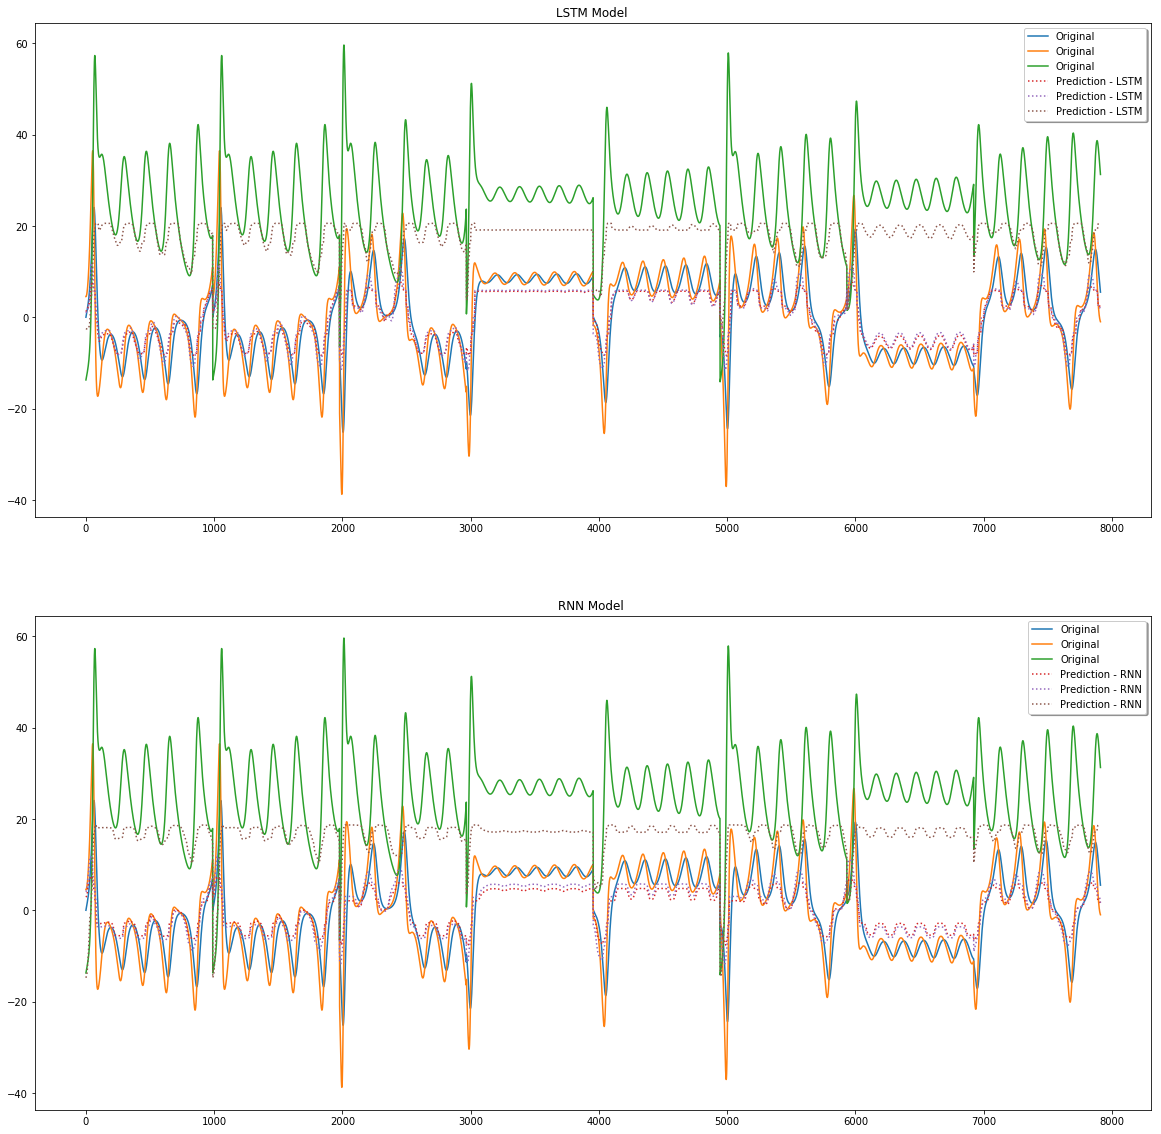

In [33]:
from matplotlib import pyplot as plt
# plot baseline and predictions
print("Graphing LSTM and RNN on Training data ")
plt.figure(figsize=(20,20))
plt.subplot(2 ,1, 1)
plt.title("LSTM Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(trainPredict, linestyle=':', label='Prediction - LSTM')
plt.legend(loc='upper right', shadow=True)

plt.subplot(2, 1, 2)
plt.title("RNN Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(RNNtrainPredict, linestyle=':', label='Prediction - RNN')
plt.legend(loc='upper right', shadow=True)
plt.show()


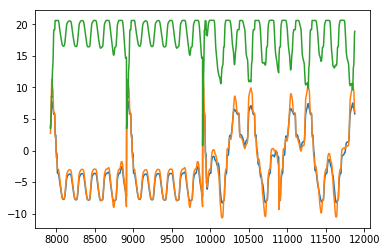

In [34]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list, testPredict) # plot baseline and predictions

In [35]:
print(trainPredict-y_train)

[[  1.22741703  -3.56664481  11.25618108]
 [  1.11739943  -3.52292499  11.08790812]
 [  1.00872421  -3.51053708  10.9211119 ]
 ...
 [ -3.57431048   2.86697543 -11.42098561]
 [ -3.31329195   2.94416568 -11.0614318 ]
 [ -3.07094547   2.99606797 -10.70483395]]


## Calculate difference between prediction and actual

Graphing LSTM true test output against predicted output 


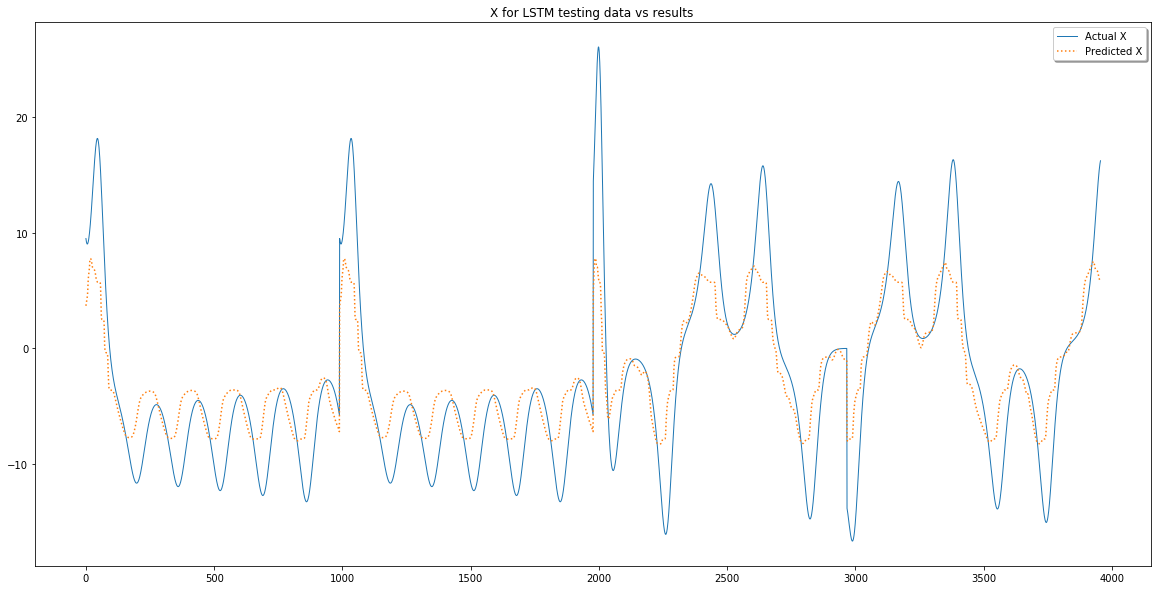

In [36]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for LSTM testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


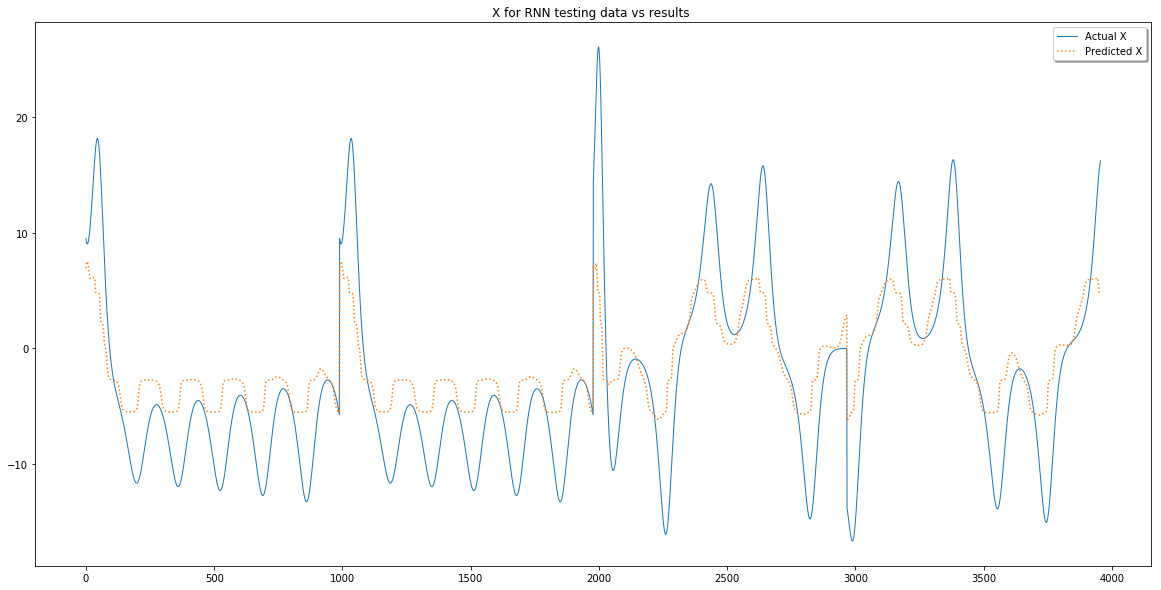

In [37]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for RNN testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(RNNtestPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing LSTM true test output against predicted output 


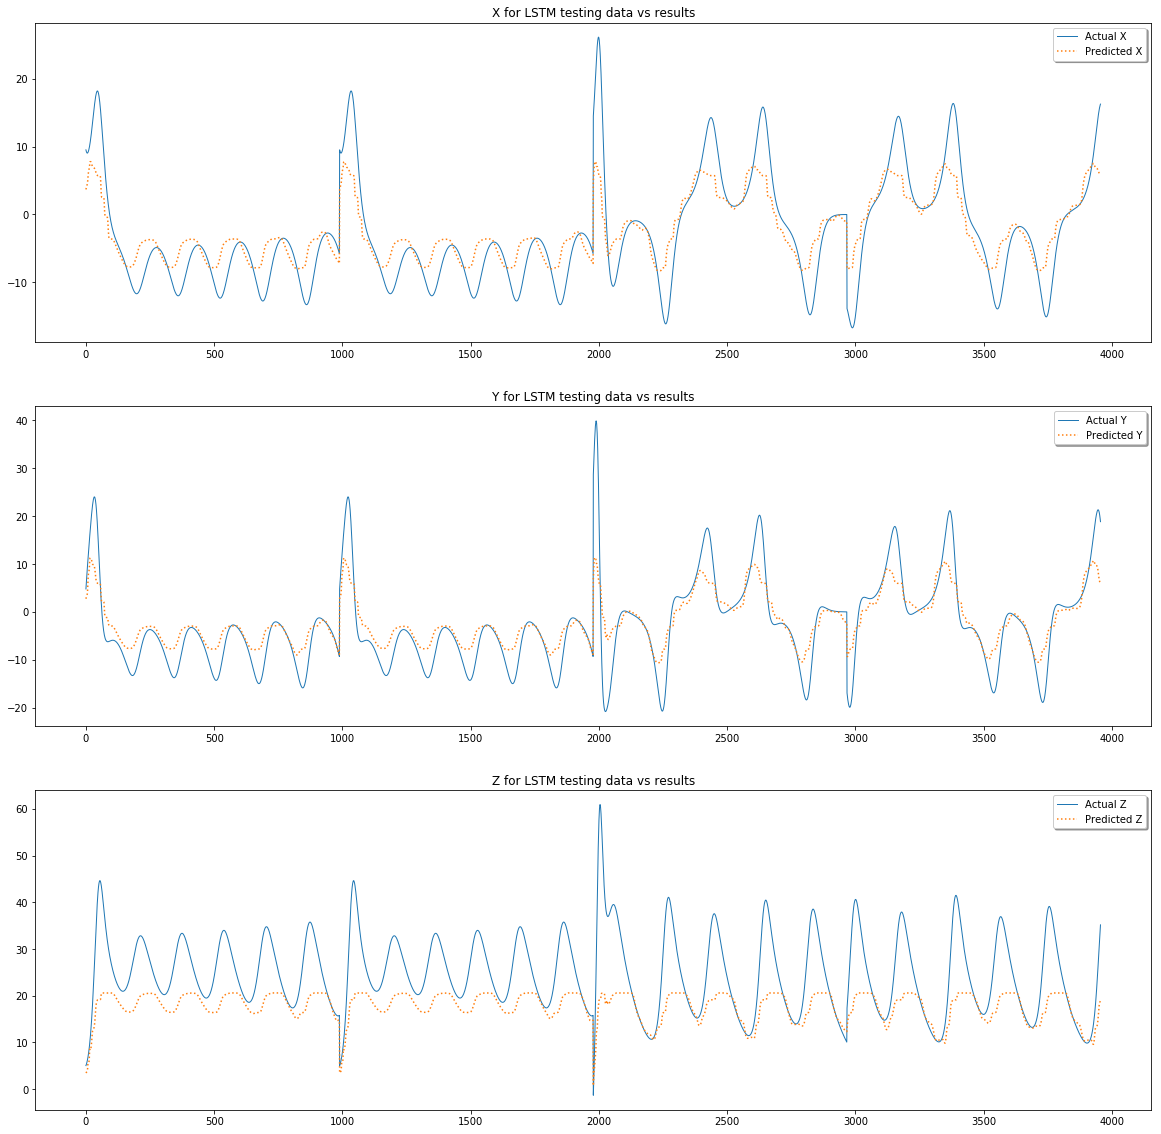

In [38]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for LSTM testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for LSTM testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for LSTM testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


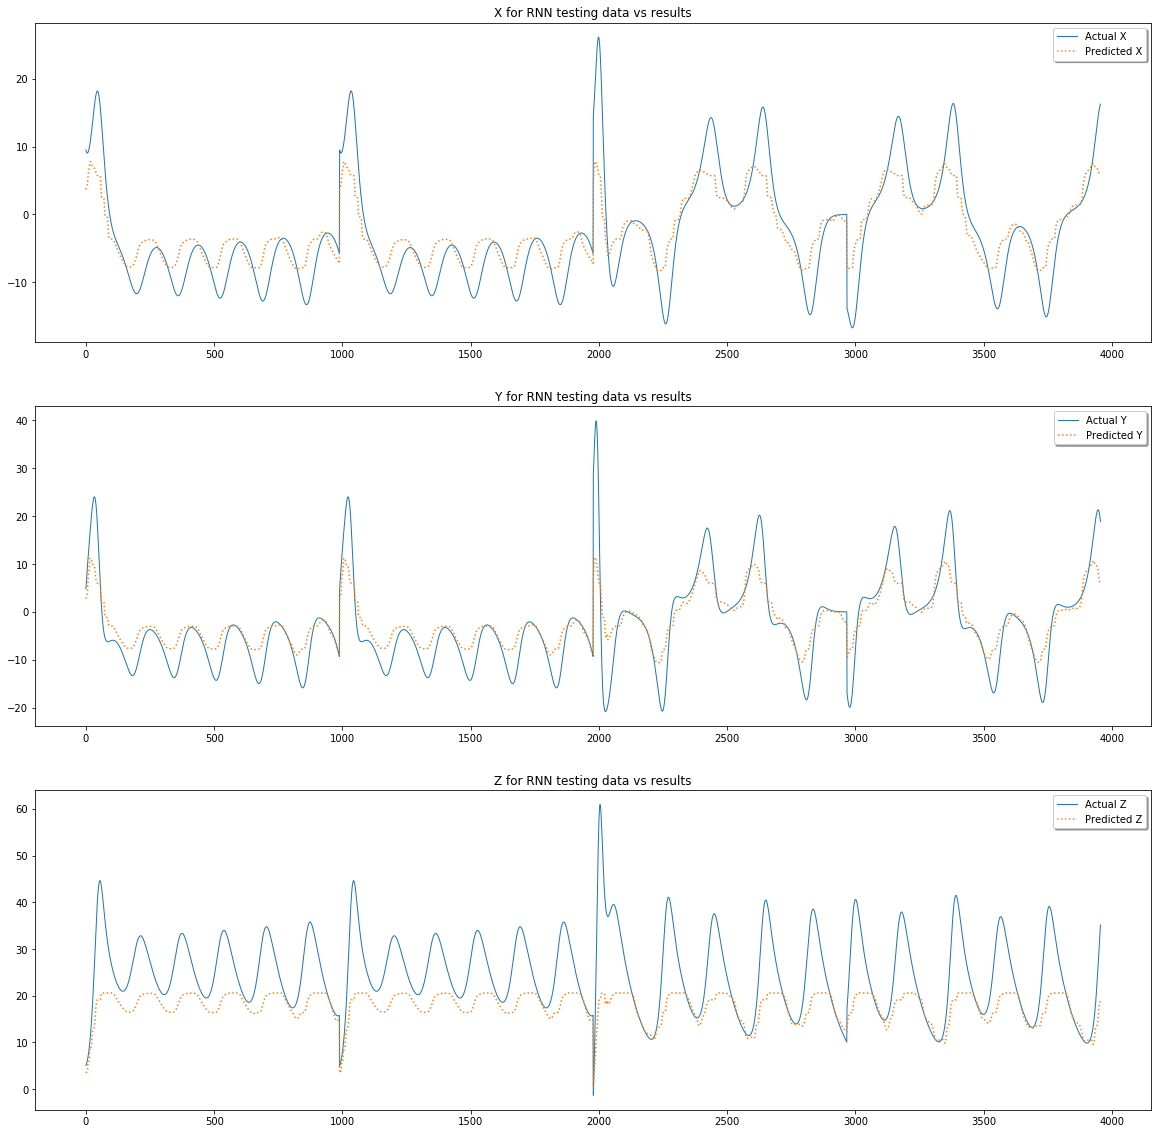

In [39]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for RNN testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for RNN testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for RNN testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [40]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [41]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [42]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[ 3.6807756  2.7334826  3.4821105]
 [ 3.8485787  2.9538414  3.545713 ]
 [ 3.9804833  3.1229806  3.6204753]
 ...
 [ 5.867405   6.2383327 18.692472 ]
 [ 5.8370175  6.1760173 18.788345 ]
 [ 5.8064246  6.1158795 18.88115  ]]


In [43]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[ -5.82666126  -2.04870551  -1.57211795]
  [ -5.65885822  -1.82834666  -1.50851551]
  [ -5.52695361  -1.65920752  -1.43375316]
  ...
  [ -3.64003197   1.45614464  13.638244  ]
  [ -3.67041937   1.39382917  13.73411688]
  [ -3.70101229   1.33369143  13.82692084]]

 [[ -5.65791325  -2.89071965  -1.71369493]
  [ -5.4901102   -2.6703608   -1.65009248]
  [ -5.3582056   -2.50122165  -1.57533013]
  ...
  [ -3.47128395   0.6141305   13.49666703]
  [ -3.50167136   0.55181504  13.59253991]
  [ -3.53226427   0.49167729  13.68534387]]

 [[ -5.52837858  -3.71002231  -1.88135309]
  [ -5.36057553  -3.48966346  -1.81775064]
  [ -5.22867093  -3.32052431  -1.7429883 ]
  ...
  [ -3.34174928  -0.20517216  13.32900887]
  [ -3.37213668  -0.26748762  13.42488174]
  [ -3.4027296   -0.32762537  13.5176857 ]]

 ...

 [[-12.30859152 -17.08047199 -29.92833217]
  [-12.14078847 -16.86011314 -29.86472972]
  [-12.00888387 -16.69097399 -29.78996738]
  ...
  [-10.12196223 -13.57562184 -14.71797021]
  [-10.15234963 -1

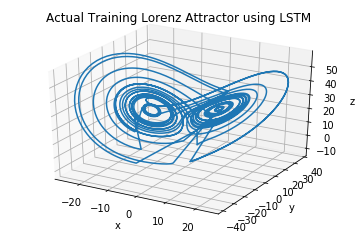

In [44]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Training Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

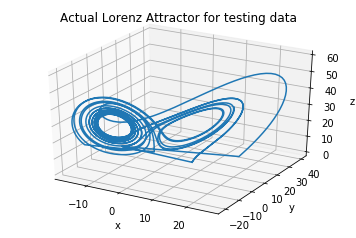

In [45]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Lorenz Attractor for testing data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

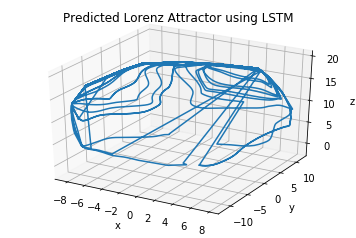

In [46]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

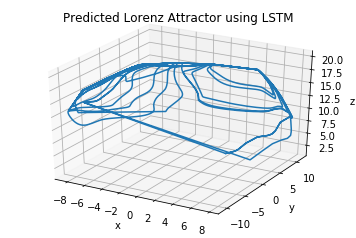

In [47]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

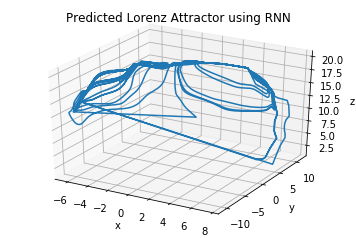

In [48]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using RNN')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(RNNtestPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

## Testing with single starting point - predicting 1 ahead

In [49]:
SEQUENCE_SIZE = 10
single_t, single_lor = solve_lorenz(N=1) #try 10 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
singlePredict = model.predict(single_x)
RNNsinglePredict = RNNmodel.predict(single_x)
print ("Shape of data: ", single_lor.shape)
print ("Shape of windowed data: ", single_x.shape)

Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing LSTM true test output against predicted output 


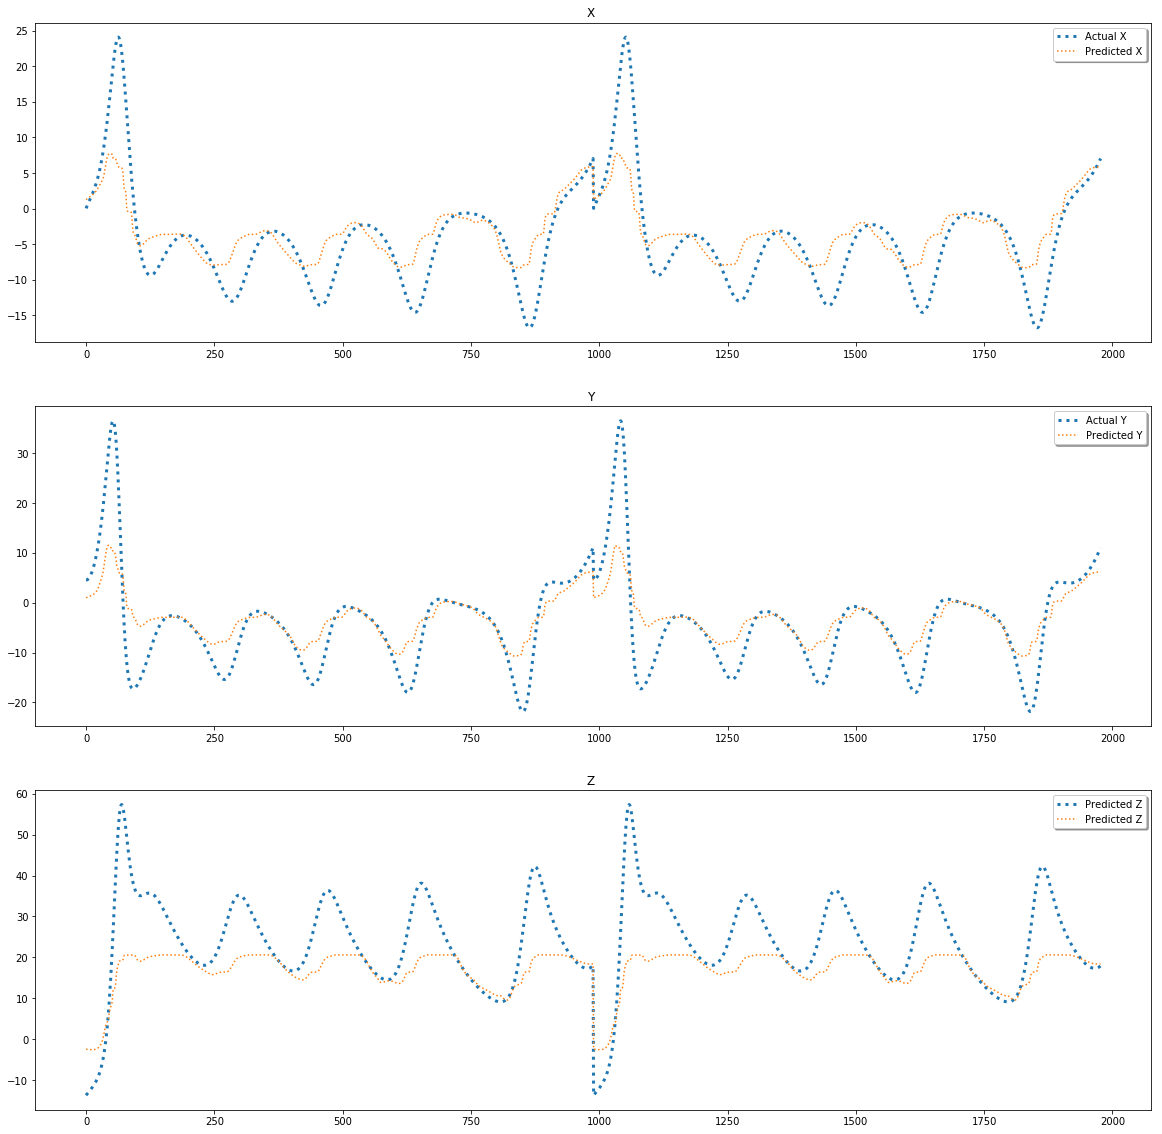

In [50]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X')
plt.plot(singlePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(singlePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Predicted Z')
plt.plot(singlePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


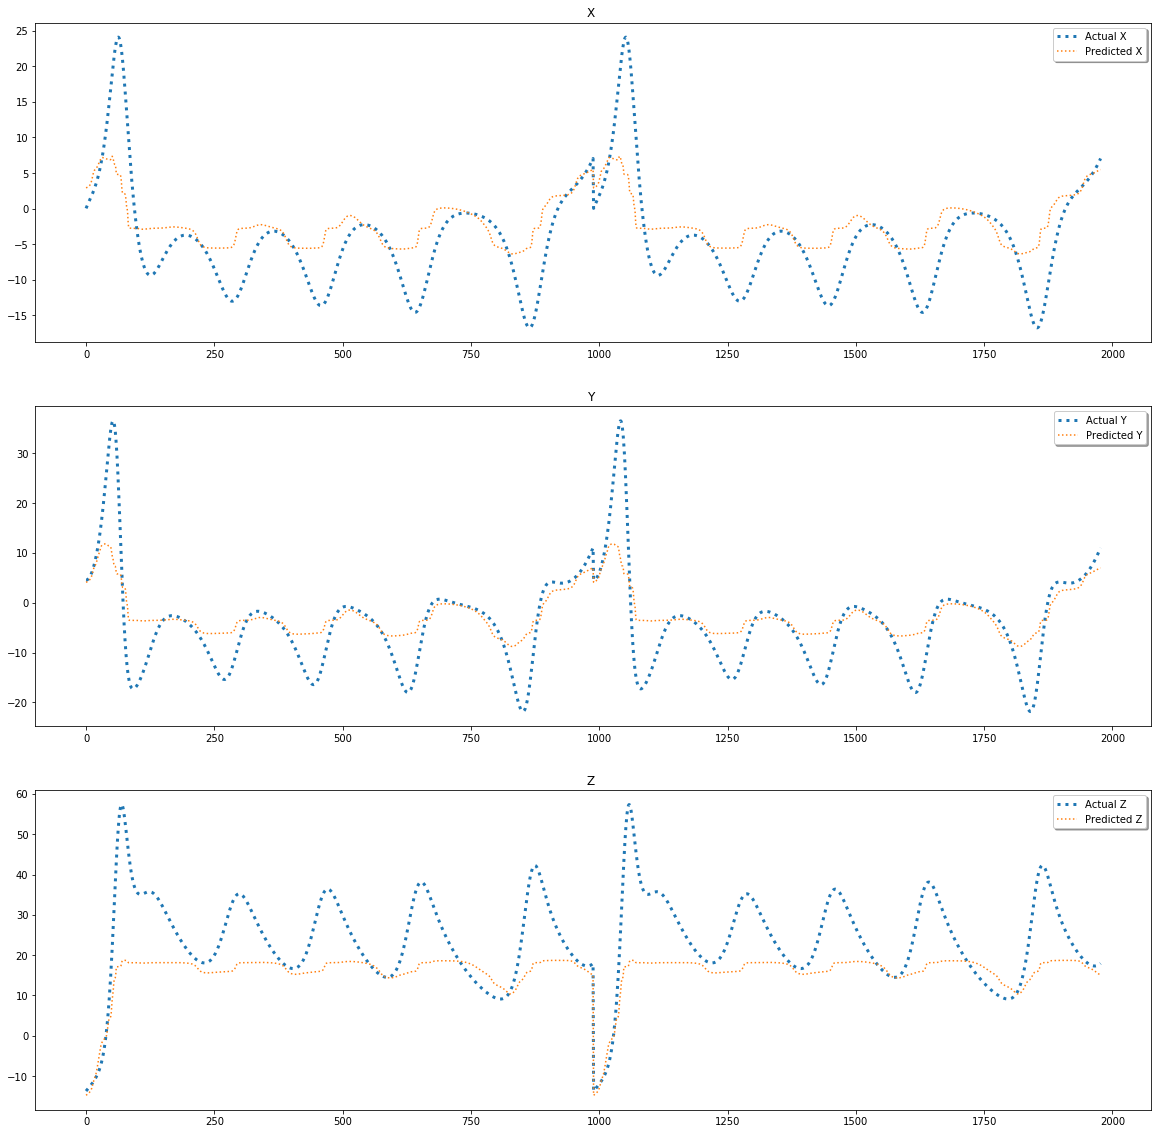

In [51]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(RNNsinglePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(RNNsinglePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Actual Z')
plt.plot(RNNsinglePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [52]:
print ("Calculating LSTM error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with single time series
Shape of output:  (1978, 3)
Average error =  9.66368130251167


In [53]:
print ("Calculating RNN error with single time series")
print("Shape of output: ",single_y.shape)
RNNerr3D = single_y - RNNsinglePredict
RNNerr1D = (single_y - RNNsinglePredict)**2
RNNerr1D = RNNerr1D.sum(axis=-1)
RNNerr1D = np.sqrt(RNNerr1D)
RNNaveErr = np.average(RNNerr1D)
print("Average error = ", RNNaveErr)

Calculating RNN error with single time series
Shape of output:  (1978, 3)
Average error =  11.077581581752844


Graphing true test output against predicted output 


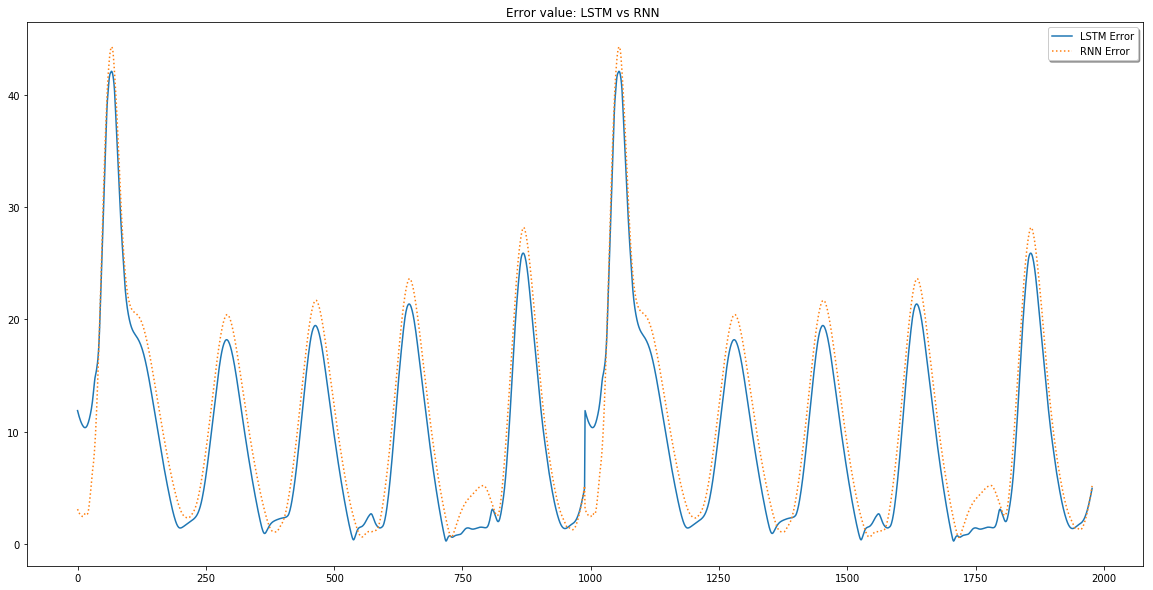

In [54]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value: LSTM vs RNN ")
plt.plot(err1D, linestyle='-', label='LSTM Error')
plt.plot(RNNerr1D, linestyle=':', label='RNN Error')
plt.legend(loc='upper right', shadow=True)
plt.show()

## Testing with single starting point - predicting 5 steps ahead

In [55]:
SEQUENCE_SIZE = 10
multi_t, multi_lor = solve_lorenz(N=5) #try 10 random starting point initially, change to 100 later
multi_x, multi_y  = to_sequences_ray(SEQUENCE_SIZE, multi_lor)
LSTMmultiPredict = model.predict(multi_x)
RNNmultiPredict = RNNmodel.predict(multi_x)
print ("Shape of data: ", multi_lor.shape)
print ("Shape of windowed data: ", multi_x.shape)

Shape of data:  (5, 1000, 3)
Shape of windowed data:  (5934, 10, 3)


In [56]:
for i in range(5):
    print("i: ", i)
    SEQUENCE_SIZE = 10
    multi_t, multi_lor = solve_lorenz(N=1) #try 10 random starting point initially, change to 100 later
    multi_x, multi_y  = to_sequences_ray(SEQUENCE_SIZE, multi_lor)
    LSTMmultiPredict = model.predict(multi_x)
    print ("Shape of data: ", multi_lor.shape)
    print ("Shape of windowed data: ", multi_x.shape)

i:  0
Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)
i:  1
Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)
i:  2
Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)
i:  3
Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)
i:  4
Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing LSTM true test output against predicted output 


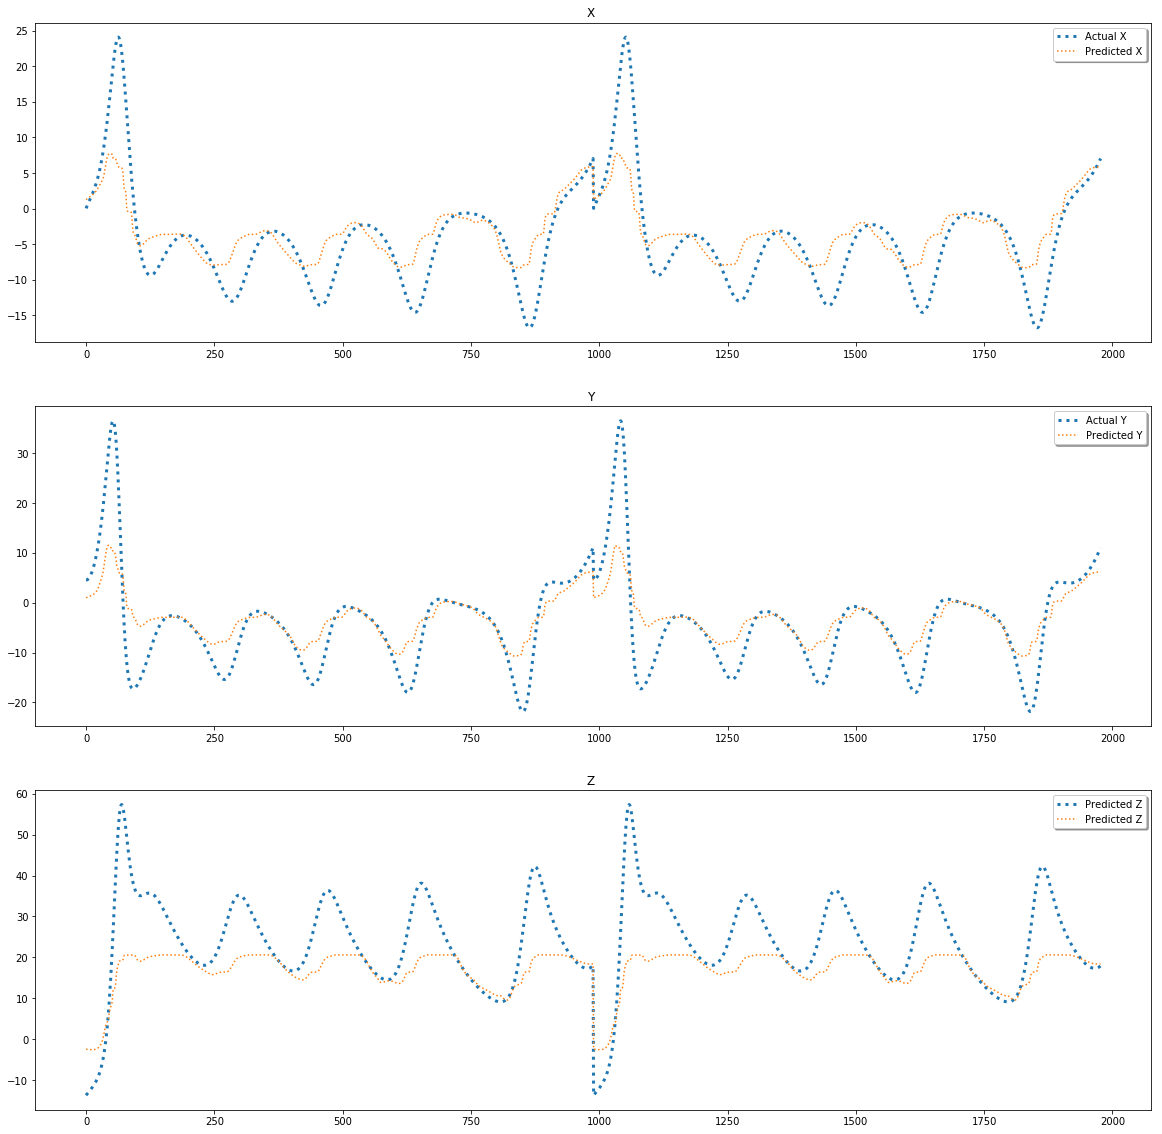

In [57]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(multi_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X')
plt.plot(LSTMmultiPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(multi_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(LSTMmultiPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(multi_y[:,2:3], linewidth=3.0, linestyle=':', label='Predicted Z')
plt.plot(LSTMmultiPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [58]:
print ("Calculating LSTM error with multi step time series")
print("Shape of output: ", multi_y.shape)
err3D = multi_y - LSTMmultiPredict
err1D = (multi_y - LSTMmultiPredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with multi step time series
Shape of output:  (1978, 3)
Average error =  9.66368130251167


In [59]:
SEQUENCE_SIZE = 10
PREDICTION_LENGTH = 20
single_t, single_lor = solve_lorenz(N=1) #try 1 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
pattern = single_x[1]
print ("Shape of  input data: ", single_x.shape)
print ("Shape of  pattern: ", pattern.shape)
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
prediction = pattern

print ("Shape of  input data: ", single_x.shape)
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)
next = model.predict(pattern)
print("next : ", next.shape)
nextNum = next[0]
print("next number: ", nextNum.shape)
nextNum = nextNum.reshape(1,1,3)
pattern = np.concatenate((pattern, nextNum), axis=1)
prediction = np.concatenate((prediction, nextNum), axis=1)
print ("Shape of  pattern: ", pattern.shape)
pattern = pattern[0:,1:len(pattern),0:]
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)


Shape of  input data:  (1978, 10, 3)
Shape of  pattern:  (10, 3)
Shape of  input data:  (1978, 10, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 10, 3)
next :  (1, 3)
next number:  (3,)
Shape of  pattern:  (1, 11, 3)
Shape of  pattern:  (1, 0, 3)
Shape of  prediction data:  (1, 11, 3)


In [60]:
pattern = pattern[1:len(pattern)]
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)

ValueError: cannot reshape array of size 0 into shape (1,10,3)

In [ ]:
SEQUENCE_SIZE = 10
PREDICTION_LENGTH = 2000
single_t, single_lor = solve_lorenz(N=1) #try 1 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
pattern = single_x[1]
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
prediction = pattern
for i in range(PREDICTION_LENGTH):
    next = model.predict(pattern)
    #print("next : ", next.shape)
    nextNum = next[0]
    #print("next number: ", nextNum.shape)
    nextNum = nextNum.reshape(1,1,3)
    pattern = np.concatenate((pattern, nextNum), axis=1)
    prediction = np.concatenate((prediction, nextNum), axis=1)
    #print ("Shape of  pattern: ", pattern.shape)
    pattern = pattern[0:,1:SEQUENCE_SIZE+1,0:]
    print ("Shape of  pattern: ", pattern.shape)
    print ("Shape of  prediction data: ", prediction.shape)


In [ ]:
print ("Shape of  actual: ", single_y.shape)
prediction = prediction.reshape(SEQUENCE_SIZE+PREDICTION_LENGTH,3)
print ("Shape of  prediction: ", prediction.shape)

In [ ]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(prediction[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

In [ ]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(prediction[1,:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(prediction[1,:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Actual Z')
plt.plot(prediction[1,:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

### References

1. Woolley, Jonathan W., Agarwal, P. K., and Baker, John. Modeling and prediction of
chaotic systems with artificial neural networks. International Journal for Numerical
Methods in Fluids. 63:989–1004, 2010.
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. Project Jupyter (2017). Exploring the Lorenz System of Differential Equations. Retrieved
from
http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf 
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn 
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/